In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image
import seaborn as sns

#import torch
#import torchvision
#import torchvision.transforms as transforms
#import torch.optim as optim
#from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split

#from tqdm import tqdm
#from tqdm.notebook import tqdm

#from torchviz import make_dot

#from torchmetrics import Recall, Precision, F1Score

In [83]:
fire_base_path = "C:\\Users\\johnn\\Desktop\\Repos\\Capstonfire\\FIRE Dataset"
#base_path_maria = "C:\\Users\\Maria Carolina\\Documents\\GitHub\\Capstonfire\\trained_models\\fire_dataset"

# Exploratory Data Analysis

## Fire Dataset

### Label distribution

In [3]:
non_fire_count = len(os.listdir(os.path.join(fire_base_path, "non_fire_images")))
fire_count = len(os.listdir(os.path.join(fire_base_path, "fire_images")))
print(fire_count)
print(non_fire_count)

755
244


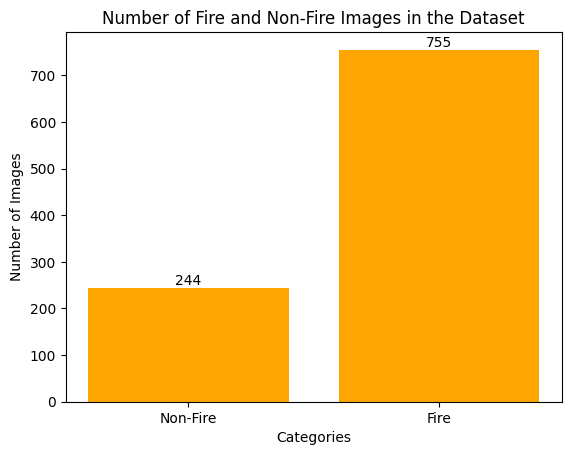

In [6]:
# Bar plot
categories = ['Non-Fire', 'Fire']
counts = [non_fire_count, fire_count]


plt.bar(categories, counts, color="orange")

plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Fire and Non-Fire Images in the Dataset')

for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
    
plt.show()

The dataset is imbalanced.

([<matplotlib.patches.Wedge at 0x28b2686b090>,
 [Text(-0.7636263952882066, 0.7917542095998856, 'Non-Fire'),
  Text(0.7636264694175826, -0.7917541381040188, 'Fire')],
 [Text(-0.4165234883390218, 0.4318659325090285, '24.4%'),
  Text(0.41652352877322685, -0.43186589351128296, '75.6%')])

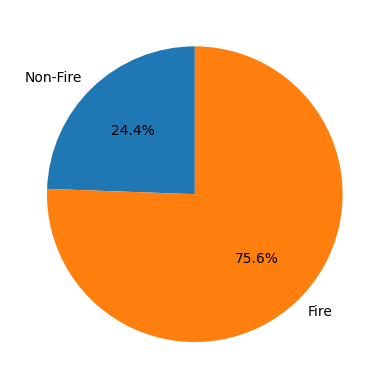

In [7]:
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)

### Distribution size

In [81]:
#create an empty DataFrame
df_fire = pd.DataFrame(columns=['path','label'])

In [84]:
for dirname, _, filenames in os.walk(fire_base_path):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df_fire = pd.concat([df_fire, pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label'])], axis=0)

#loop over non fire images and label them 0
for dirname, _, filenames in os.walk(fire_base_path):
    for filename in filenames:
        df_fire = pd.concat([df_fire, pd.DataFrame([[os.path.join(dirname, filename),'non_fire']],columns=['path','label'])], axis=0)
        #print(os.path.join(dirname, filename))

#shuffle the dataset for redistribute the labels
df_fire = df_fire.sample(frac=1).reset_index(drop=True)
df_fire.head(10)

path     label
0  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...  non_fire
1  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...  non_fire
2  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...      fire
3  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...  non_fire
4  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...  non_fire
5  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...      fire
6  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...      fire
7  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...  non_fire
8  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...      fire
9  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...      fire

In [14]:
def shaper(row):
    shape = Image.open(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df_fire = df_fire.apply(shaper,axis=1)
df_fire.head(5)

path     label  height  width
0  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...  non_fire     533    800
1  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...  non_fire     640   1280
2  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...      fire    2065   3500
3  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...      fire     563   1000
4  C:\Users\johnn\Desktop\Repos\Capstonfire\FIRE ...      fire     225    400

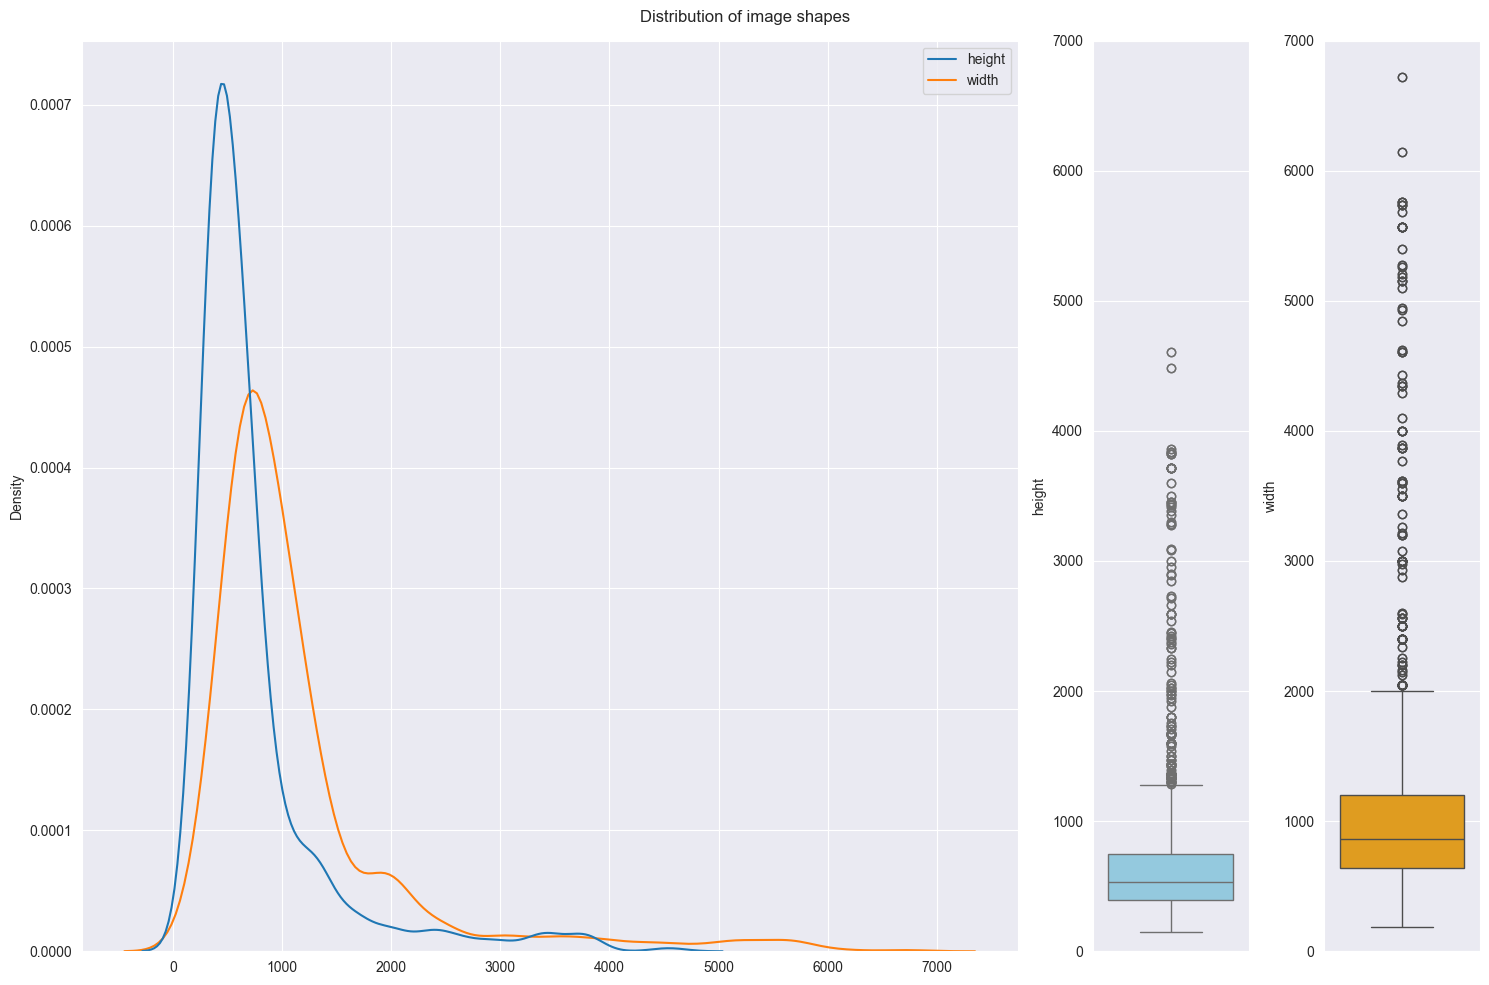

In [15]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df_fire.drop(columns=['path','label']),ax=ax1,legend=True)
sns.boxplot(data=df_fire,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df_fire,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

Most images are of a relatively small size, however some images are big. Likewise, image dimensions are very heterogeneous.

## Forest Fire dataset

In [1]:
forest_fire_base_path = "C:\\Users\\johnn\\Desktop\\Repos\\Capstonfire\\Forest Fire dataset"
#forest_fire_base_path = "C:\\Users\\Maria Carolina\\Documents\\GitHub\\Capstonfire\\trained_models\\forestfire_dataset"

What are the folders of this dataset?

In [4]:
os.listdir(forest_fire_base_path)

['test_big', 'test_small', 'train-smoke', 'train_fire']

Looks like there are four folders. Do they have any other folders inside?

In [6]:
for dir in os.listdir(forest_fire_base_path):
    print(os.listdir(os.path.join(forest_fire_base_path, dir)))

['000001.jpg', '000002.jpg', '000003.jpg', '000005.jpg', '000007.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000018.jpg', '000020.jpg', '000031.jpg', '000033.jpg', '000034.jpg', '000036.jpg', '000037.jpg', '000038.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000048.jpg', '000052.jpg', '000053.jpg', '000056.jpg', '000058.jpg', '000061.jpg', '000065.jpg', '000067.jpg', '000071.jpg', '000072.jpg', '000073.jpg', '000075.jpg', '000076.jpg', '000079.jpg', '000080.jpg', '000081.jpg', '000084.jpg', '000086.jpg', '000087.jpg', '000092.jpg', '000096.jpg', '000098.jpg', '000100.jpg', '000101.jpg', '000102.jpg', '000104.jpg', '000106.jpg', '000107.jpg', '000112.jpg', '000115.jpg', '000118.jpg', '000121.jpg', '000122.jpg', '000123.jpg', '000125.jpg', '000129.jpg', '000132.jpg', '000134.jpg', '000135.jpg', '000138.jpg', '000139.jpg', '000143.jpg', '000144.jpg', '000145.jpg', '000146.jpg', '000149.jpg', '000150.jpg', '000153.jpg', '000155.jpg', '000157.jpg', '000160.jpg', '000161.jpg', '0001

Looks like all images are within these four folders and no other subdirectory exists.

However, the images are not split by label. We might have to do the labelling manually.

For now, let's create the dataframe of the images using the folder and analyse the data within the folders.

In [85]:
df_forest_fire = pd.DataFrame(columns=['path','folder'])
       
for dirname, _, filenames in os.walk(forest_fire_base_path):
    for filename in filenames:
        df_forest_fire = pd.concat([df_forest_fire, pd.DataFrame([[os.path.join(dirname, filename),os.path.split(dirname)[1]]],columns=['path','folder'])], axis=0)     
        
#shuffle the dataset for redistribute the labels
df_forest_fire = df_forest_fire.sample(frac=1).reset_index(drop=True)
df_forest_fire.head(10)

path       folder
0  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke
1  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke
2  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke
3  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke
4  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...     test_big
5  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke
6  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke
7  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  fire_images
8  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke
9  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke

In [86]:
def shaper(row):
    shape = Image.open(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df_forest_fire = df_forest_fire.apply(shaper,axis=1)

In [28]:

df_forest_fire.head(20)

path       folder  height  \
0   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
1   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
2   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
3   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
4   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
5   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
6   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
7   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
8   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
9   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
10  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
11  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
12  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
13  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
14  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
15  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
16  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
17  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
18  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
19  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...   train_fire     168   

    width  
0    1920  
1    1920  
2    1920  
3    1920  
4    1920  
5    1920  
6    1920  
7    1920  
8    1920  
9    1920  
10   1920  
11   1920  
12   1920  
13   1920  
14   1920  
15   1920  
16   1920  
17   1920  
18   1920  
19    300

Hmm. The dataframe was shuffled and the train-smoke folder is in the last position of the dataset directory. However, many more images of this folder appear in the first 20 positions of the dataframe. An hypothesis is that the train-smoke folder has a lot more images than the other folders. Let's analyse this folder first and confirm the hypothesis.

### train-smoke folder

In [87]:
# submask the dataframe of the dataset and choose only the rows with the "train-smoke" value in the folder column
df_train_smoke = df_forest_fire[df_forest_fire['folder'] == 'train-smoke']
df_train_smoke.head(5)

path       folder  height  \
0  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
1  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
2  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
3  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
5  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   

   width  
0   1920  
1   1920  
2   1920  
3   1920  
5   1920

In [44]:
len(df_train_smoke.index)

12625

Sure enough, this folder has a lot of images.

How are the dimensions distributed?

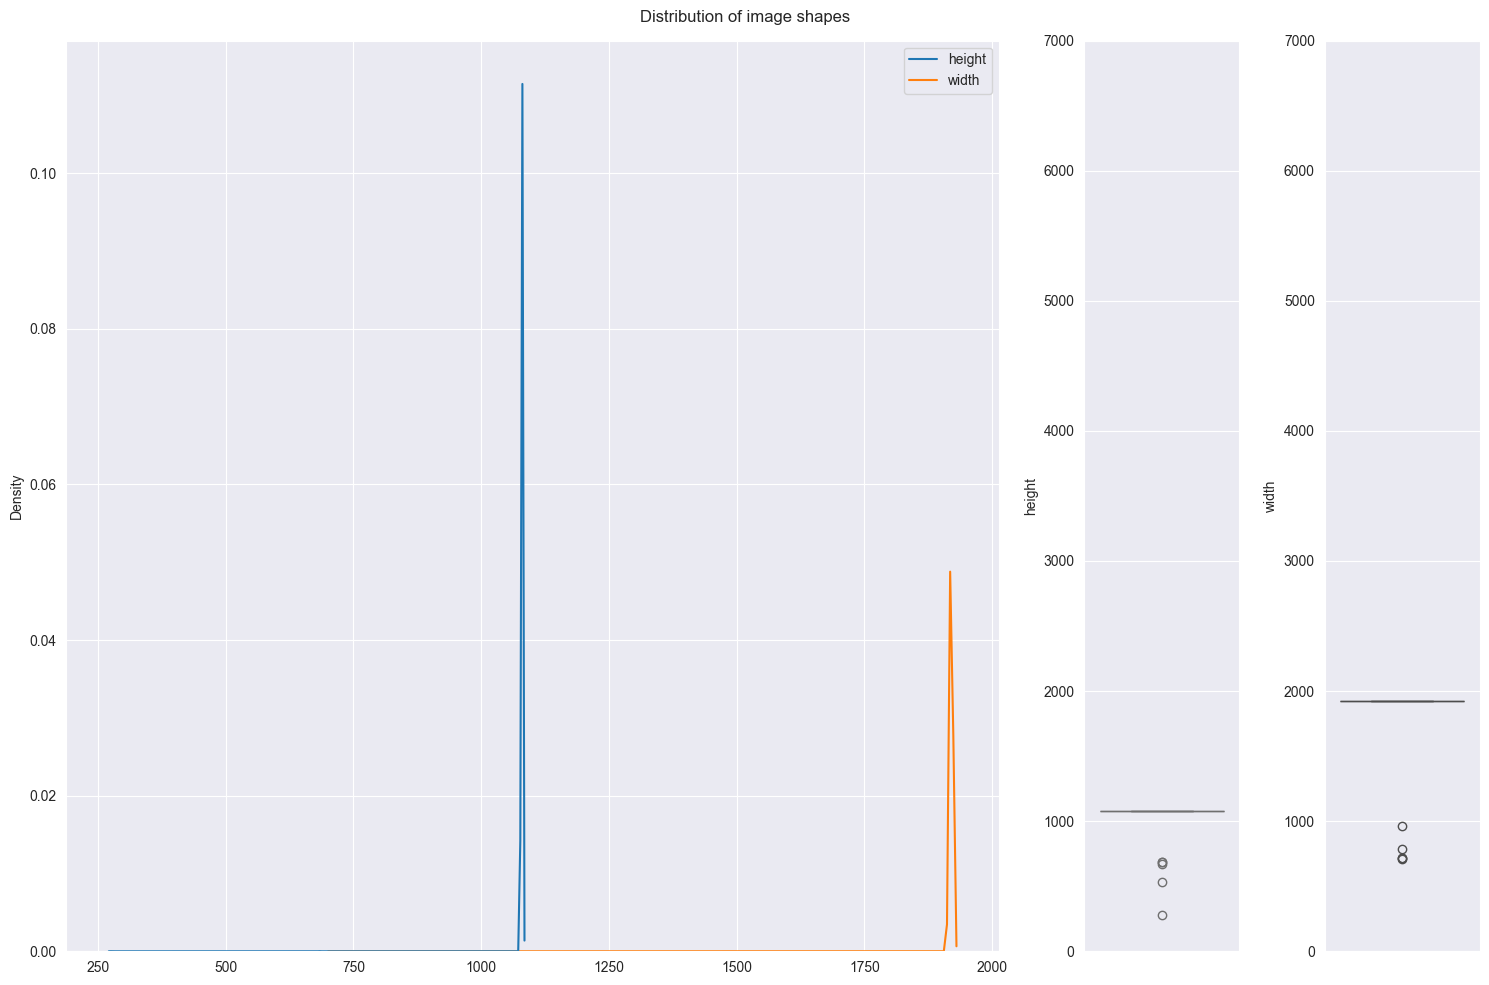

In [34]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df_train_smoke.drop(columns=['path','folder']),ax=ax1,legend=True)
sns.boxplot(data=df_train_smoke,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df_train_smoke,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

The images are quite homogeneous in size. This might make training the model easier.

What do the images look like?

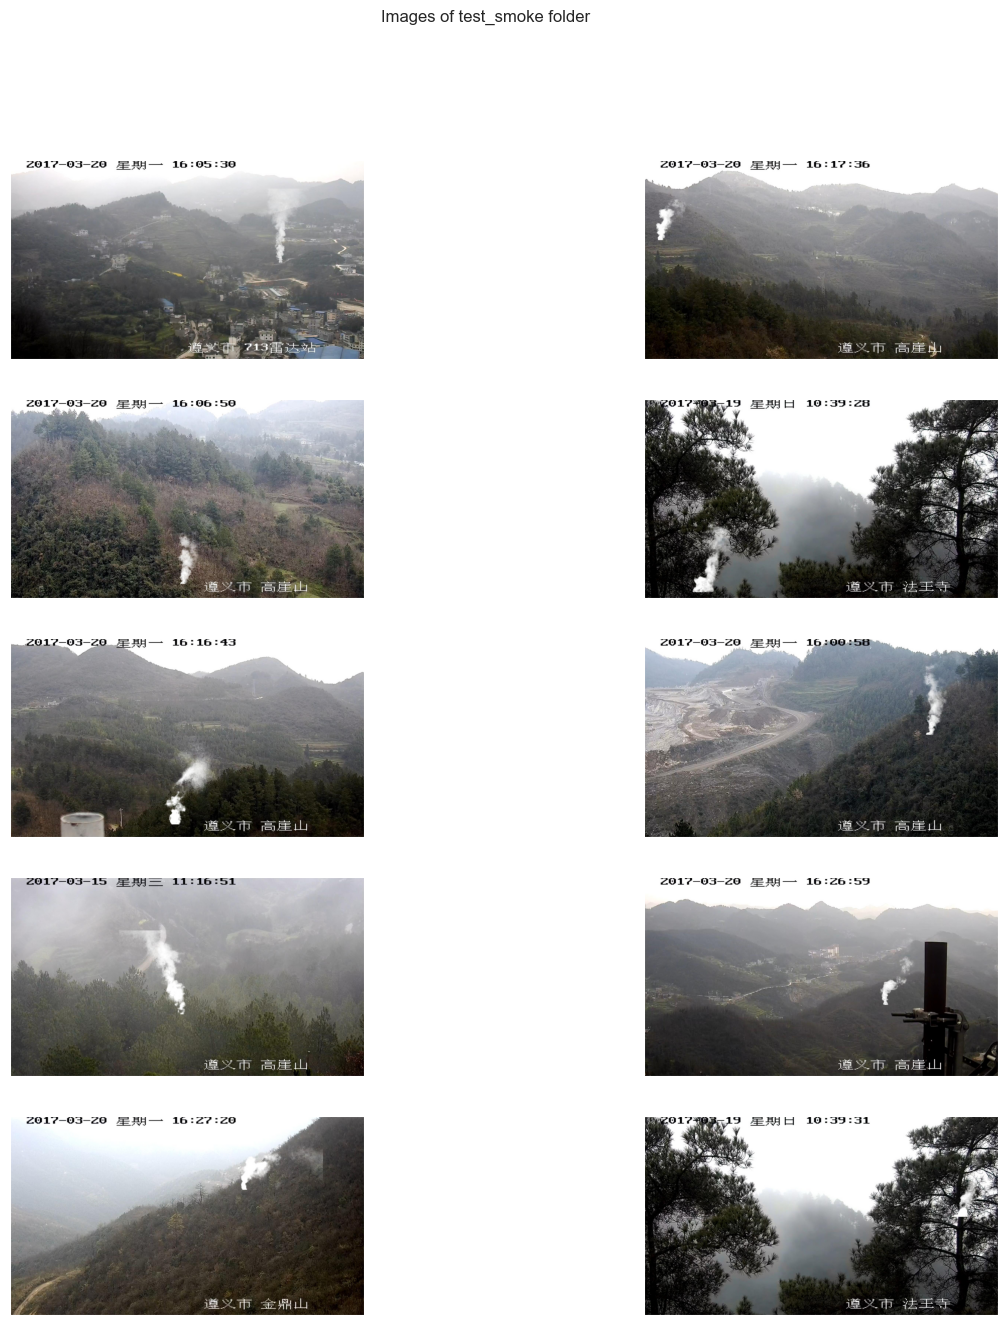

In [46]:
pics = 10 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images of test_smoke folder')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = df_train_smoke.sample(1).loc[:,'path'].to_numpy()[0]
    img = Image.open(path)
    img = np.array(img) / 255.0
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

The images look quite similar. Upon closer inspection, we observed that the test_smoke folder has over 12000 images of repeated scenarios, where a column of smoke was placed at random points of an image many times. It was a method of image generation done by the creator of the dataset to possibly train an algorithm that smoke columns can come from any point of the image, not just the center.

While the idea seems great, we decided that using all 12000 images would make the algorithm slower to train. Therefore, we decided to select 100 random images from the dataset to train the algorithm on this method only partly. We do understand that improvements are possible by amplifying these 100 images to several thousands. However, at this stage, we do not feel like it is relevant: it is best for now to give the algorithm many different photos to train it in a lot of possible scenarios.

### test_big folder

In [36]:
# submask for the "test_big" folder
df_test_big = df_forest_fire[df_forest_fire['folder'] == 'test_big']
df_test_big.head(10)

path    folder  height  \
21   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_big     360   
22   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_big     360   
30   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_big     360   
35   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_big     360   
37   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_big     360   
46   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_big     360   
52   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_big     540   
55   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_big     360   
69   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_big     360   
107  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_big     540   

     width  
21     640  
22     640  
30     640  
35     640  
37     640  
46     640  
52     960  
55     640  
69     640  
107    960

In [42]:
len(df_test_big.index)

2007

Some images. What do they look like?

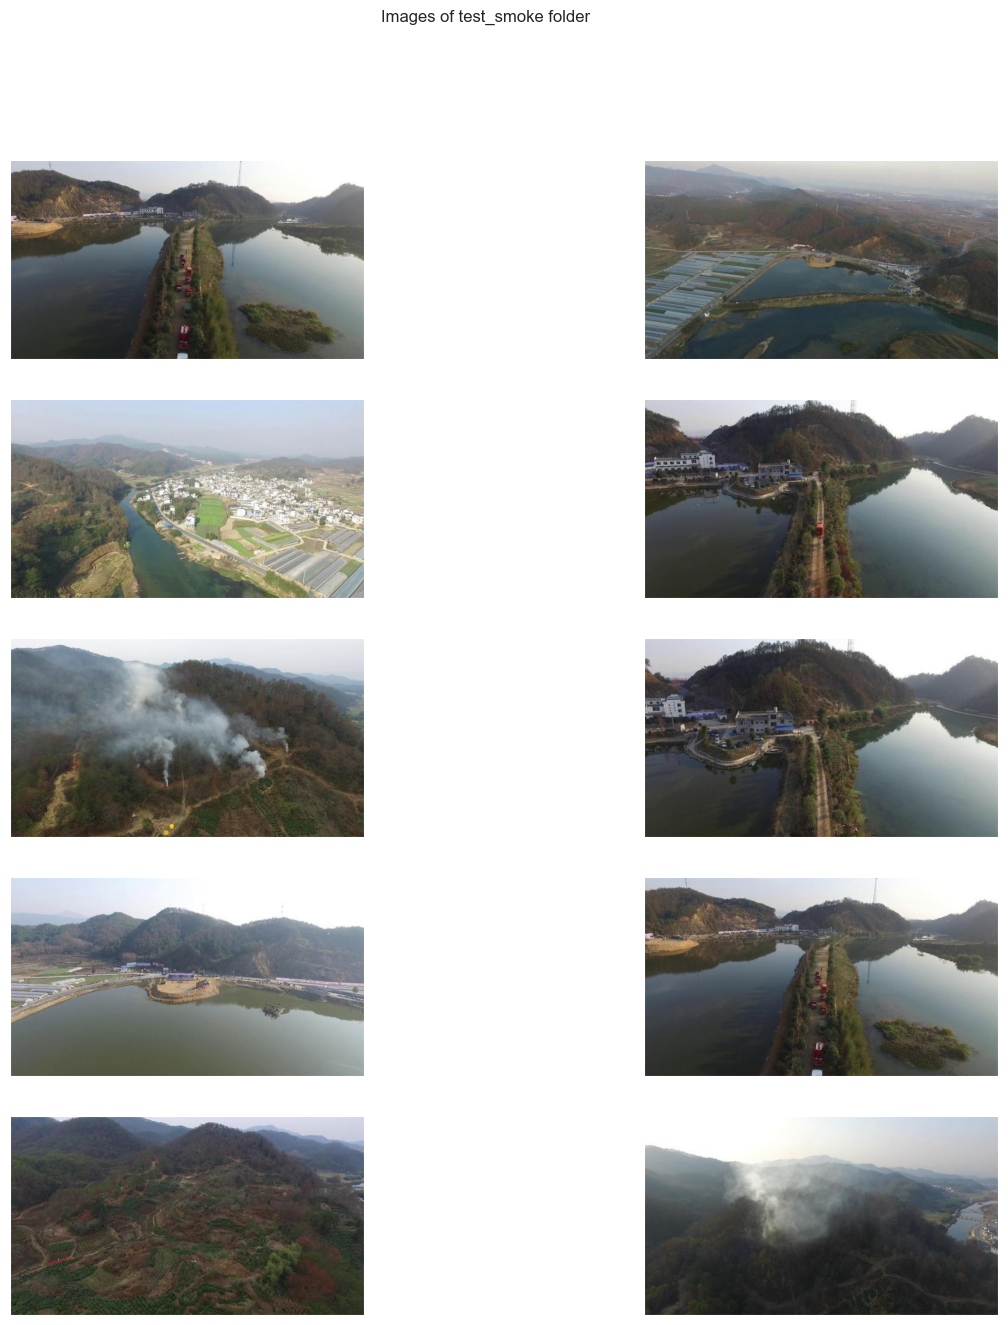

In [48]:
pics = 10 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images of test_smoke folder')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = df_test_big.sample(1).loc[:,'path'].to_numpy()[0]
    img = Image.open(path)
    img = np.array(img) / 255.0
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

Looks like there are images of both fire and non-fire. The region of all images look the same, like they were all taken in the same area.

Closer inspection shows that this folder is a video of a forest fire that was cut into a sequence of images. Conveniently enough, the first images are fire and all others are non-fire, at the exception of one photo in the middle of the fire images that does not have any fire.

How is this image sequence distributed in size?

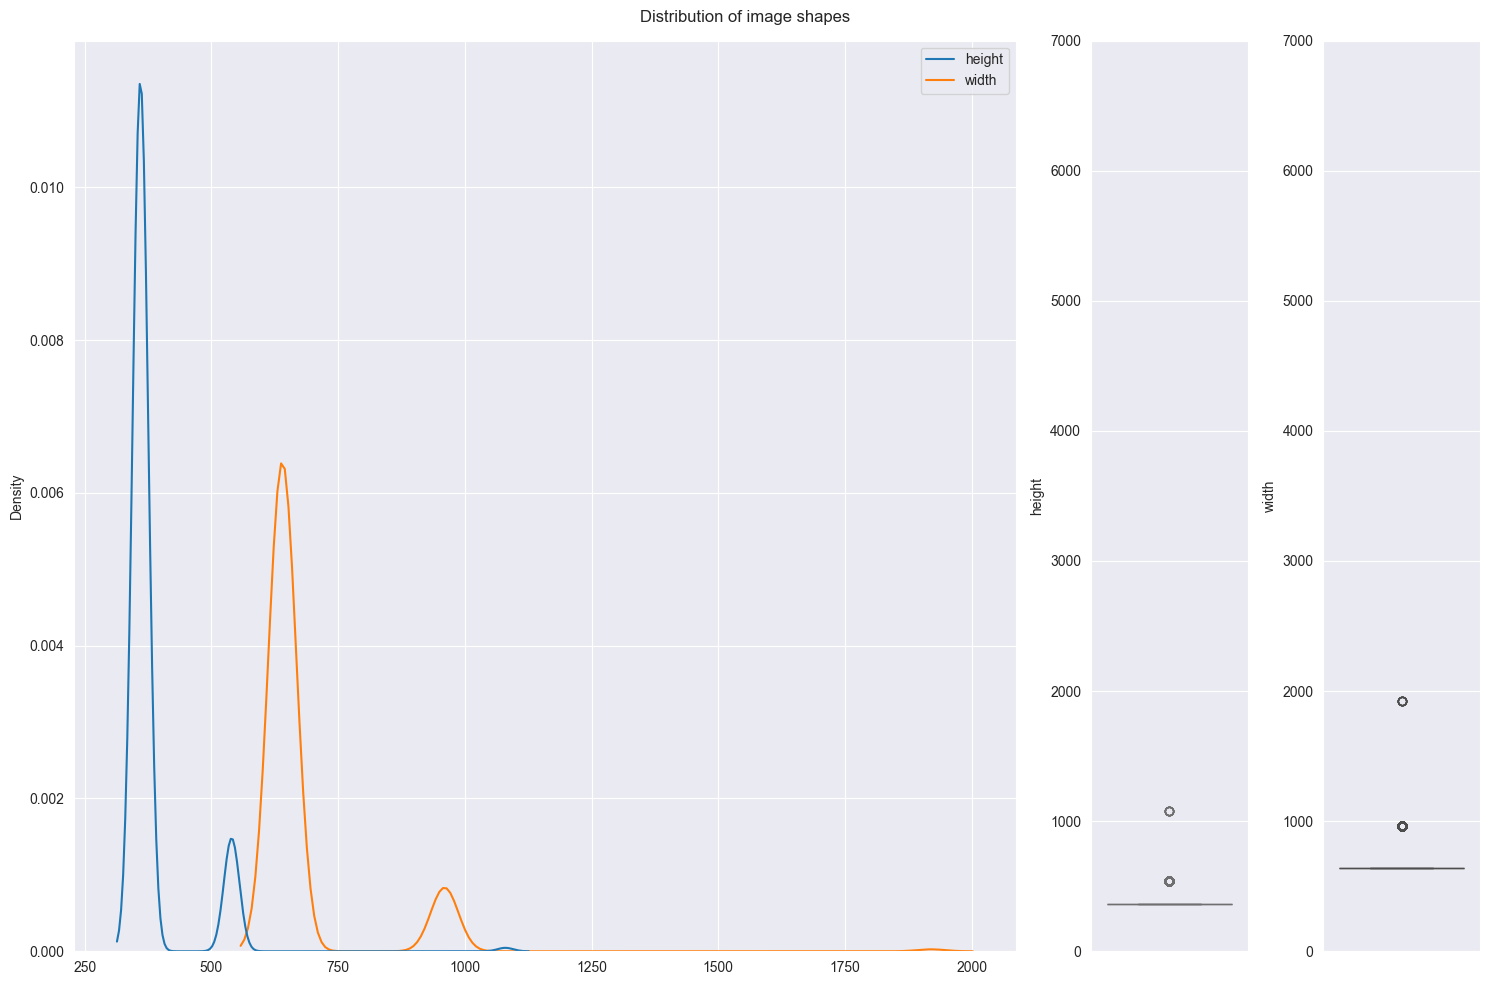

In [49]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df_test_big.drop(columns=['path','folder']),ax=ax1,legend=True)
sns.boxplot(data=df_test_big,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df_test_big,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

Quite homogeneous. Looks like a lot more images are 640x360 while a few others are 960x540. The aspect ratio of both dimensions is the same (16:9), which means all images can be easily resized to new dimensions.

### test_small folder

In [39]:
# Submask for the test_small folder
df_test_small = df_forest_fire[df_forest_fire['folder'] == 'test_small']
df_test_small.head(10)

path      folder  height  \
127   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_small     446   
426   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_small     368   
882   C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_small     567   
2416  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_small    1023   
2445  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_small     693   
3124  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_small    1073   
3542  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_small     721   
4038  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_small    1068   
4367  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_small     269   
7177  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  test_small     832   

      width  
127     500  
426     715  
882    1232  
2416   1843  
2445    937  
3124   1920  
3542    963  
4038   1914  
4367    921  
7177   1292

In [41]:
len(df_test_small.index)

25

Quite short. What do the images look like?

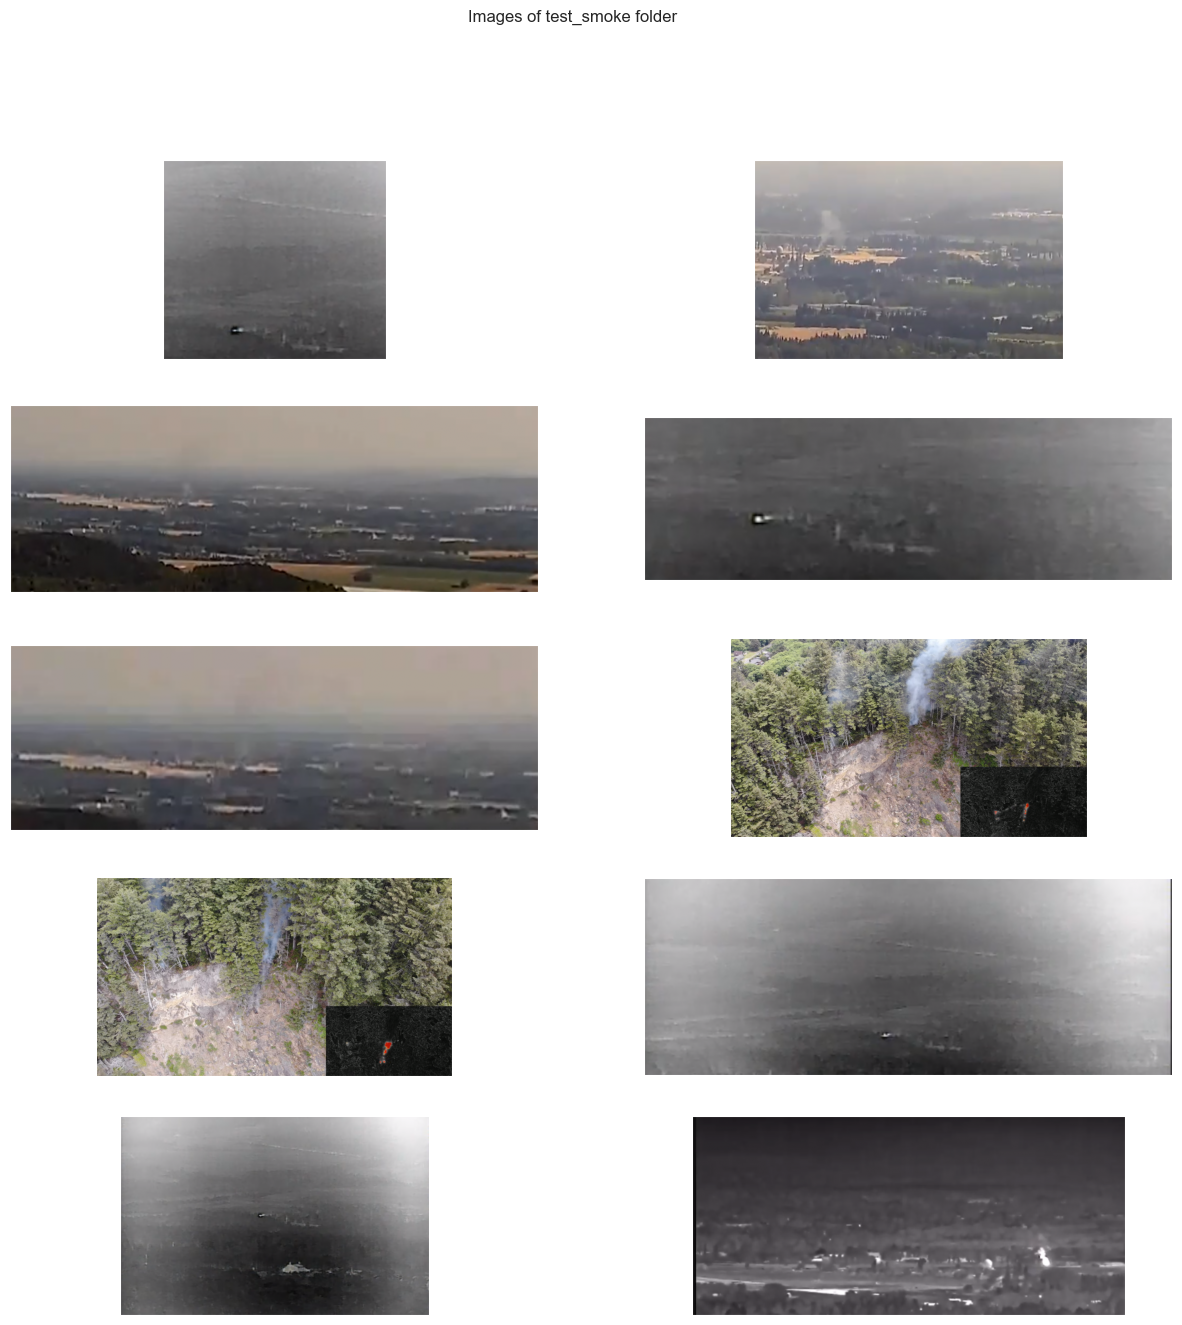

In [50]:
pics = 10 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images of test_smoke folder')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = df_test_small.sample(1).loc[:,'path'].to_numpy()[0]
    img = Image.open(path)
    img = np.array(img) / 255.0
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

Images of overall poor quality and mostly in black and white. The images also look quite wide in size distribution, which might make treatment harder. Since there are so few images, We decided to not use this folder for training.

### train_fire folder

In [51]:
# Submask for the train_fire folder
df_train_fire = df_forest_fire[df_forest_fire['folder'] == 'train_fire']
df_train_fire.head(10)

path      folder  height  \
19  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train_fire     168   
24  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train_fire     194   
29  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train_fire     168   
38  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train_fire     152   
39  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train_fire     181   
47  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train_fire     168   
57  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train_fire     168   
75  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train_fire     168   
78  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train_fire     184   
81  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train_fire     202   

    width  
19    300  
24    259  
29    300  
38    331  
39    278  
47    300  
57    299  
75    299  
78    275  
81    249

In [52]:
len(df_train_fire.index)

1102

Some images. A few more than the FIRE dataset. What do the images look like?

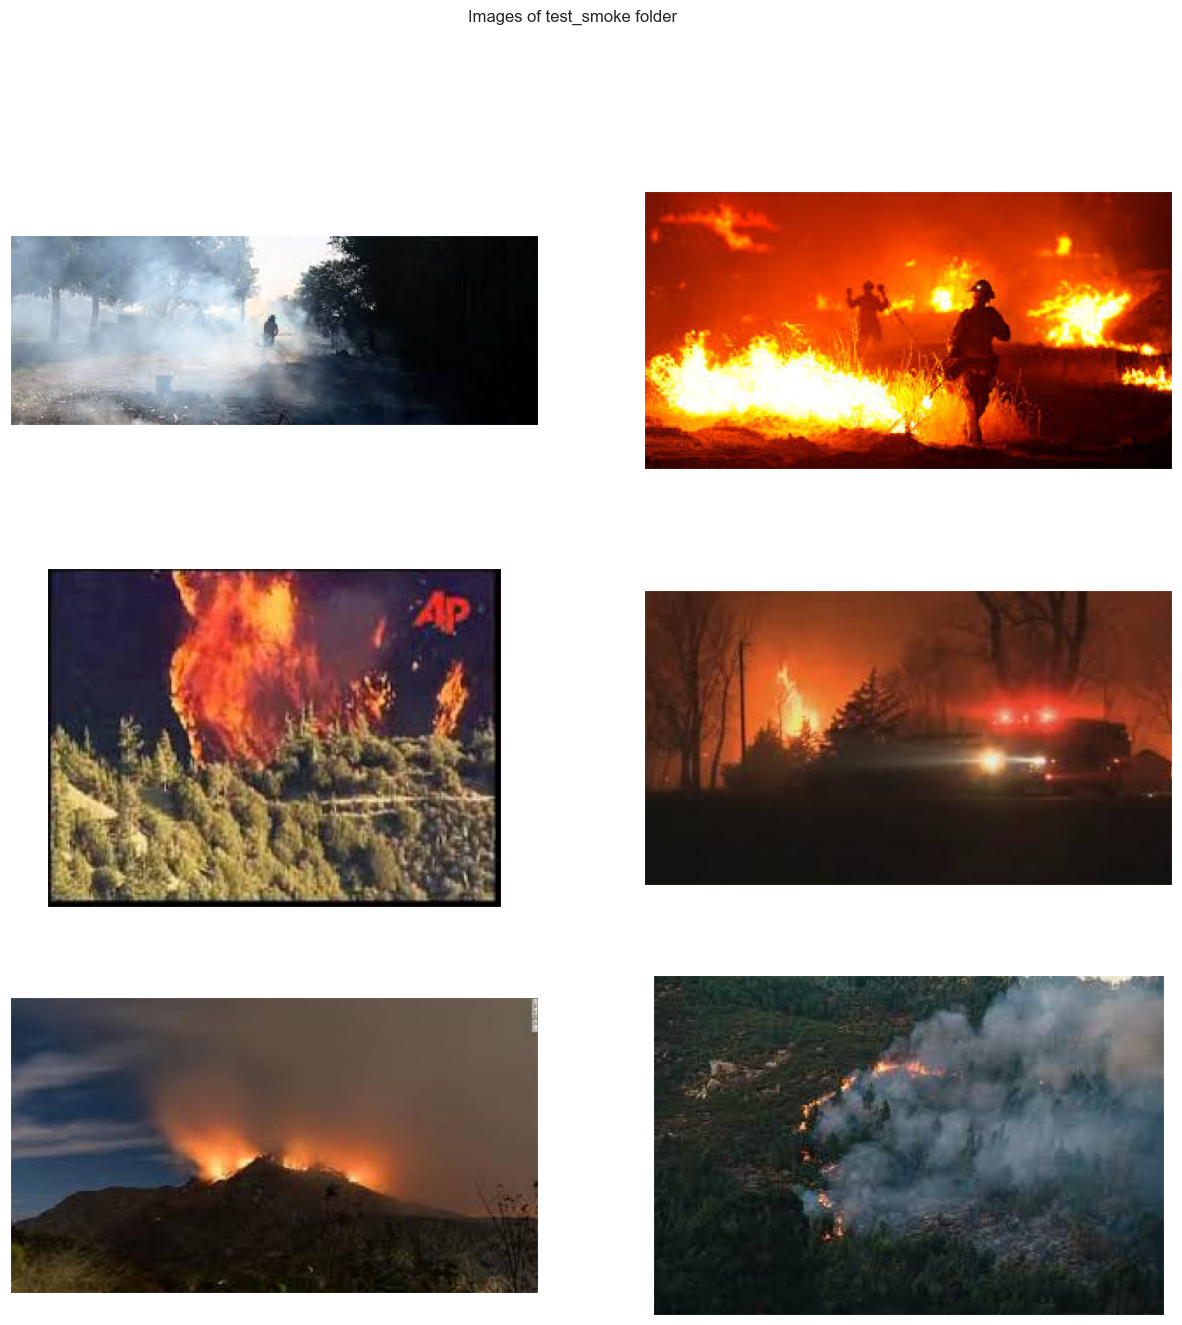

In [53]:
pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images of test_smoke folder')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = df_train_fire.sample(1).loc[:,'path'].to_numpy()[0]
    img = Image.open(path)
    img = np.array(img) / 255.0
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

The images look quite similar to those in the FIRE dataset: forest fires with different views of fire. We can use these to train the model. Closer inspection shows that there are no images without fire or smoke, which makes all images fire.

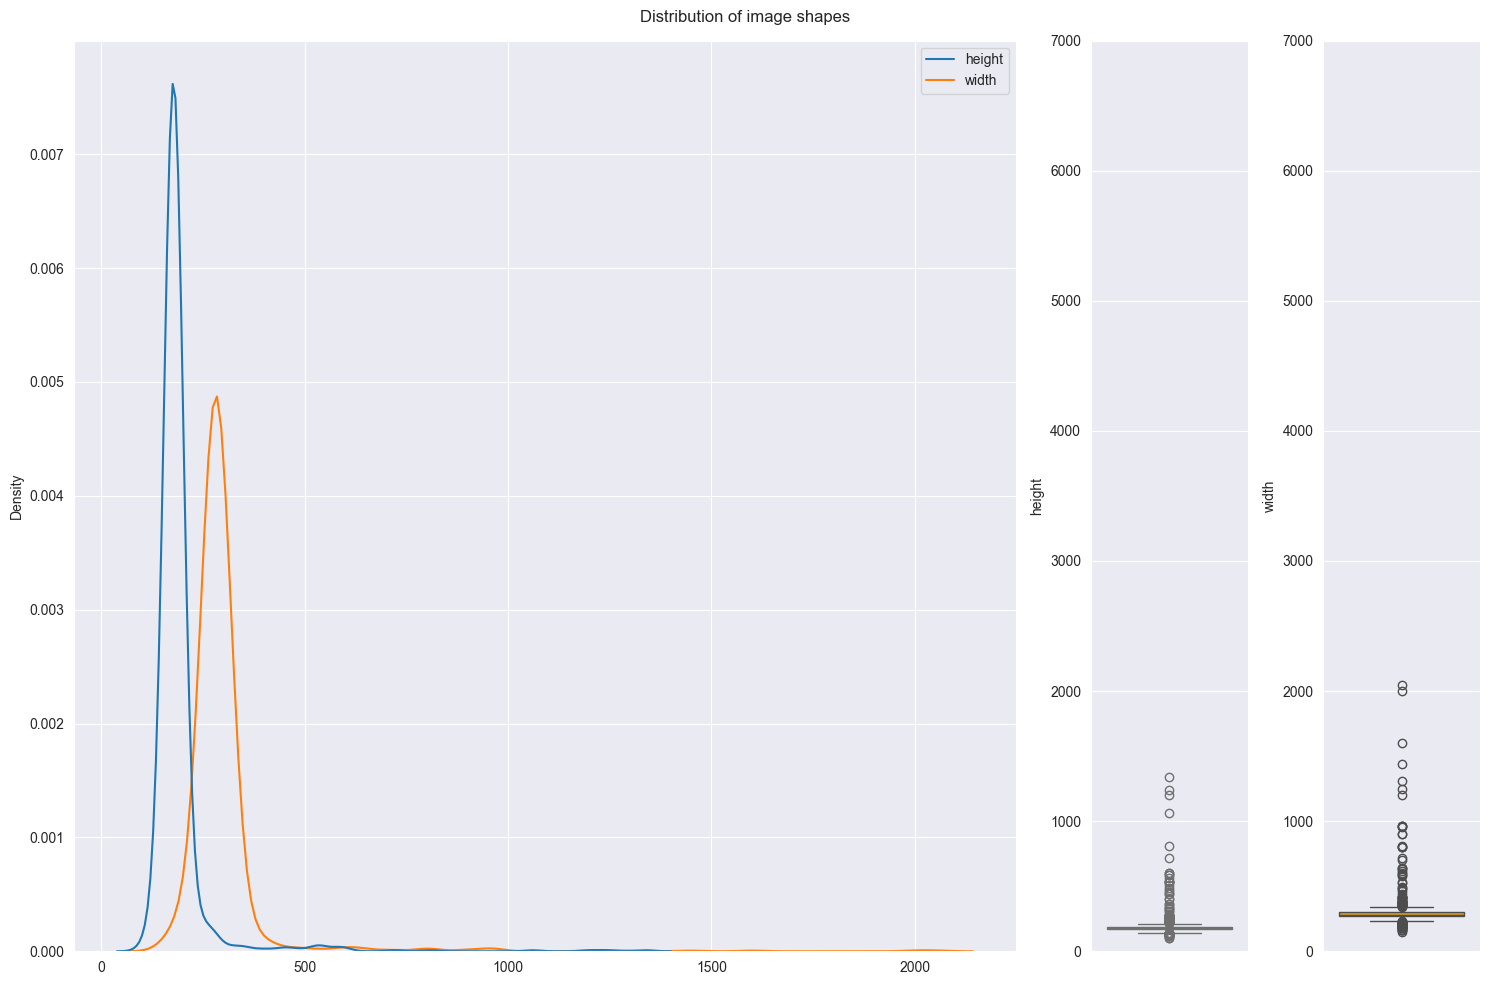

In [54]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df_train_fire.drop(columns=['path','folder']),ax=ax1,legend=True)
sns.boxplot(data=df_train_fire,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df_train_fire,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

Most images are already short and the size distribution is relatively homogeneous. Resizing these images will most likely not be necessary.

### Label creation

Now that we have analysed the folders, it makes sense to know how many images are fire and how many are non-fire.

Let's start with the train_fire folder, since all images are fire. We will transfer all images to a new "fire_images" folder

In [8]:
forest_fire_fire_path = forest_fire_base_path + "\\fire_images"
os.makedirs(forest_fire_fire_path)

In [58]:
os.listdir(forest_fire_base_path)[0]

'fire_images'

In [66]:
# testing os.walk() method to move the images from one folder to another with more relative ease
for dirpath, dirnames, filenames in os.walk(forest_fire_base_path + "\\train_fire"):
    print(dirpath, dirnames, filenames)
    break

# Outputs the directory path given as input, all subfolders and all files inside the path, respectively.

C:\Users\johnn\Desktop\Repos\Capstonfire\Forest Fire dataset\train_fire [] ['1.png', '132343342_21n.jpg', '14.jpg', '2.png', '20130611_100618_Black-Forest-Fire-engulfs-house.jpg', '3.png', '4.png', '5.png', '6.png', '7.png', '800px-Fires_cross_a_hill_in_SoCal_October_2007.jpg', '9.png', 'a.jpg', 'aggiecrk-wildfire-07072015-usfs-580.jpg', 'b.jpg', 'bcws-carousel-2.jpg', 'California+Wildfires_Rob072616e+(1).jpg', 'canada-wildfire.jpg', 'Chimney-Fire3.jpg', 'COMEX-default.jpg', 'dsc7056.jpg', 'e.jpg', 'ee.jpg', 'fire storm.jpg', 'fire-1006.77563694.png', 'fire-1047.38199112.png', 'fire-1052.72459058.png', 'fire-1058.2196599.png', 'fire-1062.38947664.png', 'fire-1078.02441415.png', 'fire-108.95616257.png', 'fire-1083.75102939.png', 'fire-1097.3702413.png', 'fire-1098.133428.png', 'fire-11.7227995052.png', 'fire-1101.17181713.png', 'fire-113.059903155.png', 'fire-1130.08667182.png', 'fire-1170.72885516.png', 'fire-1175.69664596.png', 'fire-1182.4825639.png', 'fire-1183.01476332.png', 'fire-

In [59]:
import shutil # module to facilitate moving files from one folder to another

In [68]:
for dirpath, _, filenames in os.walk(forest_fire_base_path + "\\train_fire"):
    for filename in filenames:
        shutil.move(os.path.join(dirpath, filename), forest_fire_fire_path)

In [76]:
print("new folder size: " + str(len(os.listdir(forest_fire_fire_path))))
print("old folder size: " + str(len(os.listdir(os.path.join(forest_fire_base_path, "train_fire")))))

new folder size: 1102
old folder size: 0


Great. Now let's select 100 random images from the train-smoke folder and add them to the new folder

In [88]:
df_train_smoke

path       folder  height  \
0      C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
1      C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
2      C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
3      C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
5      C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
...                                                  ...          ...     ...   
15681  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
15683  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
15684  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
15685  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   
15686  C:\Users\johnn\Desktop\Repos\Capstonfire\Fores...  train-smoke    1080   

       width  
0       1920  
1       1920  
2       1920  
3       1920  
5       1920  
...      ...  
15681   1920  
15683   1920  
15684   1920  
15685   1920  
15686   1920  

[12553 rows x 4 columns]

In [90]:
#some images might get chosen multiple times, so let's add a few more images to consider those scenarios
path_list = []
for i in range(110):
    path = df_train_smoke.sample(1).loc[:,'path'].to_numpy()[0]
    if path not in path_list:
        shutil.move(path, forest_fire_fire_path)
    else:
        continue
    path_list.append(path)

In [91]:
print("new folder size: " + str(len(os.listdir(forest_fire_fire_path))))

new folder size: 1210


Looks like a few more than 100 images were added. It's fine.

Now for the most boring folder. Since the images in test_big are not labelled, we will have to go one by one and see which ones are fire and which ones are not.

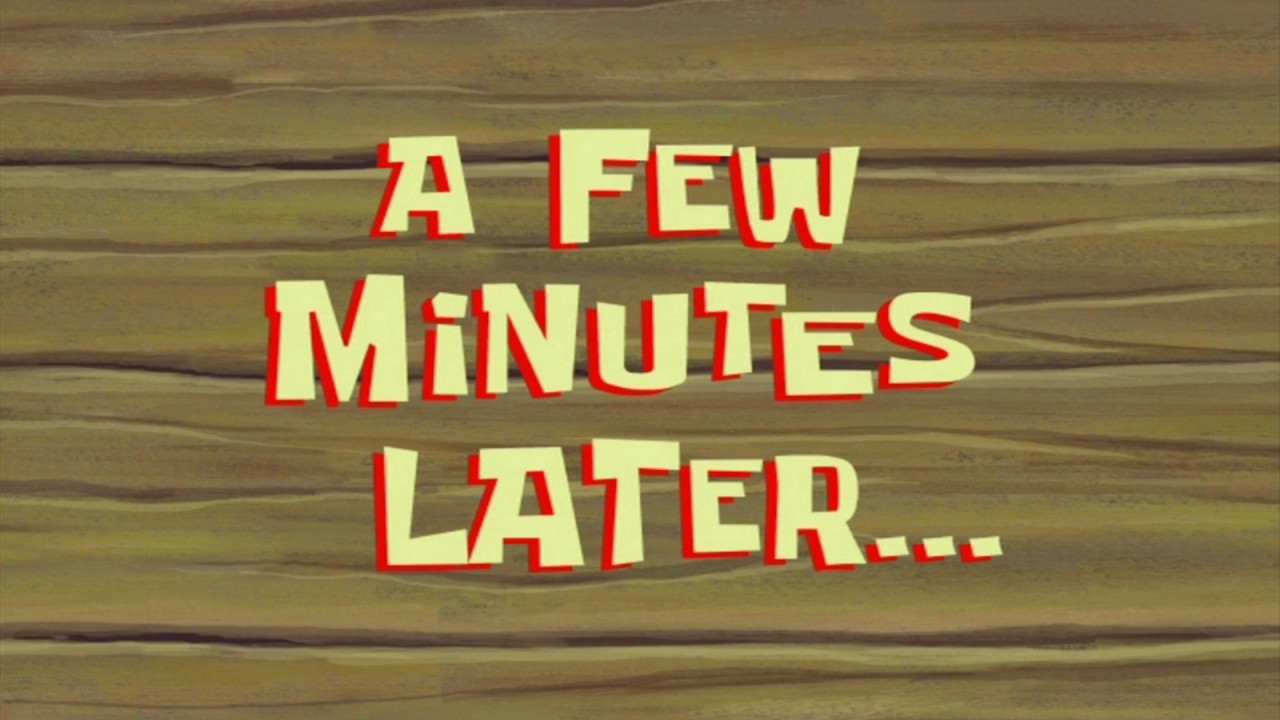

In [92]:
print("new folder size: " + str(len(os.listdir(forest_fire_fire_path))))

new folder size: 1624


Looks like over 400 images were added. The remaining 1600 images are non-fire images.

Let's create a new folder for these latter images, called "non_fire_images", so we can then manually place them there.

In [9]:
forest_fire_non_fire_path = forest_fire_base_path + "\\non_fire_images"
os.makedirs(forest_fire_non_fire_path)

In [94]:
os.listdir(forest_fire_base_path)[1]

'non_fire_images'

Let's move the images to the new folder.

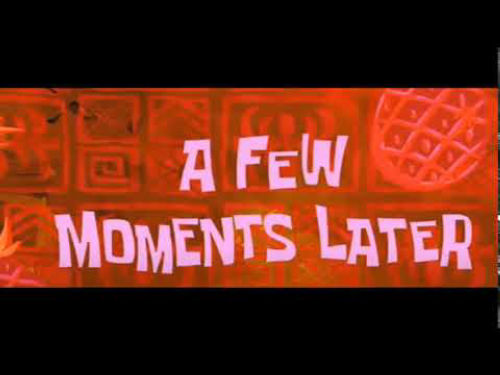

In [95]:
len(os.listdir(forest_fire_non_fire_path))

1586

Done. Let's check the label distribution and see how many images are fire and non-fire.

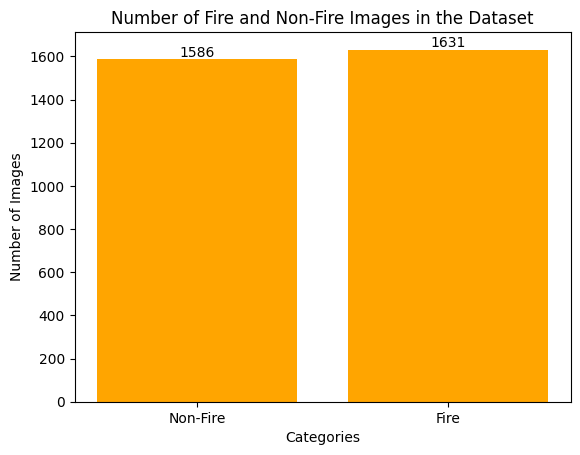

In [14]:
categories = ['Non-Fire', 'Fire']
new_counts = [len(os.listdir(forest_fire_non_fire_path)), len(os.listdir(forest_fire_fire_path))]


plt.bar(categories, new_counts, color="orange")

plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Fire and Non-Fire Images in the Dataset')

for i, count in enumerate(new_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
    
plt.show()
print(sum(new_counts))

Quite nicely balanced.

We can now move on to the Wildfire dataset